In [32]:
##pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, KFold,  GridSearchCV,  RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score



In [3]:
dataset = pd.read_csv("./train.csv")

test = pd.read_csv("./test.csv")

In [4]:
dataset["Type"].unique()

array(['L', 'M', 'H'], dtype=object)

In [5]:
dataset['Type'] = dataset['Type'].replace({"L": 0, "M": 1, "H": 2})

In [6]:
dataset['Type'] = dataset['Type'].astype('category')

In [7]:
dataset.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,0,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


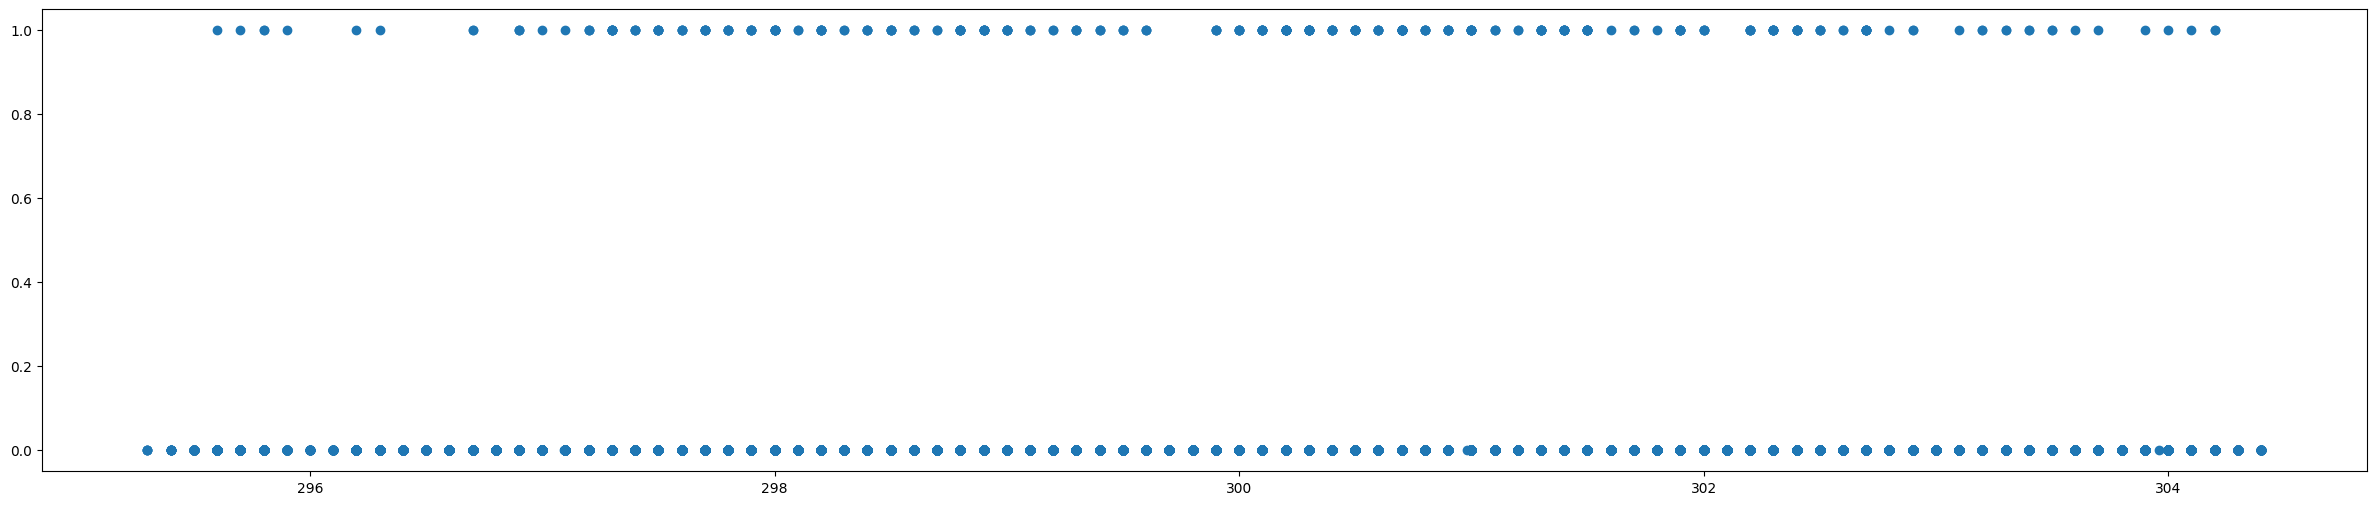

In [8]:



# Create the scatter plot
plt.figure(figsize=(30,6))
plt.scatter(dataset["Air temperature [K]"], dataset["RNF"])

# Show the plot
plt.show()


In [9]:
# Count the occurrences of each category
not_failed_h = (dataset == 0).sum()
failed_h = (dataset == 1).sum()
print(failed_h)
not_failed_h


id                             1
Product ID                     0
Type                       32152
Air temperature [K]            0
Process temperature [K]        0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Machine failure             2148
TWF                          212
HDF                          704
PWF                          327
OSF                          540
RNF                          308
dtype: int64


id                              1
Product ID                      0
Type                        95354
Air temperature [K]             0
Process temperature [K]         0
Rotational speed [rpm]          0
Torque [Nm]                     0
Tool wear [min]              3790
Machine failure            134281
TWF                        136217
HDF                        135725
PWF                        136102
OSF                        135889
RNF                        136121
dtype: int64

ValueError: 'label' must be of length 'x'

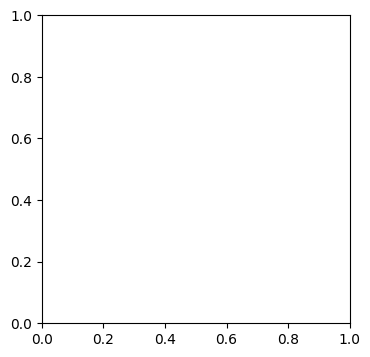

In [10]:
# Count the occurrences of each class (1 and 0)
class_counts = {}
for value in dataset:
    class_counts[value] = class_counts.get(value, 0) + 1

# Extract class labels and counts
class_labels = ['not failed h', 'failed h']#list(class_counts.keys())
class_counts = list(class_counts.values())

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90)
plt.title('dataset - Class Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [ ]:
not_failed = (dataset['Machine failure'] == 0).sum()
failed = (dataset['Machine failure'] == 1).sum()
print(failed)
not_failed

In [ ]:
# Count the occurrences of each class (1 and 0)
class_counts = {}
for value in dataset['Machine failure']:
    class_counts[value] = class_counts.get(value, 0) + 1

# Extract class labels and counts
class_labels = ['not failed', 'failed']#list(class_counts.keys())
class_counts = list(class_counts.values())

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90)
plt.title('Machine Failure - Class Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [ ]:
class_labels


In [ ]:
## checking the correlation
data_corr = dataset.corr(method = 'pearson') ## using pandas
data_corr

In [ ]:
size = plt.subplots(figsize=(21,15))
hm = sns.heatmap(data=data_corr, square = True, annot = True) ### printing the labels of the data in the heatmap

plt.show

In [ ]:
dataset

In [11]:
### creating data cleaning pipeline
def removing_column(dataset):
    dataset = dataset.drop('Product ID', axis=1)
    return dataset

## changing the datatype to categorical data

def remove_missing_values(dataset):
    # Remove rows with missing values (NaN or empty strings)
    dataset = dataset.dropna(subset=['Type', 'Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], how='all')
    return dataset

def removing_duplicates(dataset):
    dataset = dataset.drop_duplicates(subset=['Type', 'Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
    return dataset





In [12]:
def data_cleaning_pipeline(dataset):
    dataset = removing_column(dataset)
    dataset = remove_missing_values(dataset)
    dataset = removing_duplicates(dataset)
    return dataset
      
cleaned_dataset = data_cleaning_pipeline(dataset)




In [13]:
cleaned_dataset["Type"].unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [14]:
cleaned_dataset.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,0,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# Cross validation

In [15]:
## horizontal spliting 
X = cleaned_dataset.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12]]
y = cleaned_dataset['Machine failure']

In [16]:
X.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,0,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,3,0,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [17]:
# Create a logistic regression model
logreg_model = LogisticRegression()


In [18]:
98.4/1.6

61.5

In [19]:
# Perform k-fold cross-validation (e.g., k=5)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
#5 ## the equal spliting of the data
cv_scores = cross_val_score(logreg_model, X, y, cv=k_fold)

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.9842543  0.98495657 0.98484568 0.98410586 0.98432764]
Mean cross-validation score: 0.9844980109665744


In [20]:
# Initialize SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)


In [21]:
num_folds = 5
cv_scores = cross_val_score(logreg_model, X_balanced, y_balanced, cv=num_folds, scoring='accuracy')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1207, in fit
    X, y = self._validate_data(
  File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
  File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [24]:
# Iterate over the folds
for fold_num, (train_index, test_index) in enumerate(k_fold.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

In [25]:
### test
len(y_val)

27054

In [26]:
pred= [0] * len(y_val) ### 0s, the same length as test length
pred
#### test vs pred using accuracy as metrics

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [27]:
#### test vs pred using accuracy as metrics

# Initialize variables for correct and total predictions
correct_predictions = 0
total_predictions = len(pred)

# Calculate the number of correct predictions
for pred, actual in zip(pred, y_val):
    if pred == actual:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9839949730169291


## Decision tree

In [32]:
# Create a decision tree classifier with custom class weights
# We assign a higher weight to the minority class (class 1) to make it more influential during training
dt_classifier = DecisionTreeClassifier(class_weight={0:582 , 1: 477976})

# Perform cross-validation with balanced data and custom class weights
num_folds = 5
cv_scores = cross_val_score(dt_classifier, X, y, cv=num_folds, scoring='accuracy')

# Print cross-validation results
print("Cross-validation Accuracy Scores:")
print(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-validation Accuracy Scores:
[0.98754389 0.9914988  0.99105526 0.99142456 0.99441857]
Mean Accuracy: 0.9911882154361749
Standard Deviation: 0.0021856936099778007


## Random Forest 

In [36]:
rf_classifier = RandomForestClassifier(class_weight={0: 500, 1: 1500})

# Perform cross-validation with balanced data and custom class weights
num_folds = 5
cv_scores = cross_val_score(rf_classifier, X, y, cv=num_folds, scoring='accuracy')

# Print cross-validation results
print("Cross-validation Accuracy Scores:")
print(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))






Cross-validation Accuracy Scores:
[0.9962299  0.99619294 0.99637775 0.99608191 0.99541657]
Mean Accuracy: 0.996059815180074
Standard Deviation: 0.0003352553805331045


## KNeigbors

In [38]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')


# Perform cross-validation with balanced data and custom class weights
num_folds = 5
cv_scores = cross_val_score(knn_classifier, X_resampled, y_resampled, cv=num_folds, scoring='accuracy')



# Print cross-validation results
print("Cross-validation Accuracy Scores:")
print(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

except Exception as e:
    print("Error occurred during cross-validation:", e)

SyntaxError: invalid syntax (3858816300.py, line 21)

## Spliting the dataset

In [28]:
X_x = X.drop(columns=['Type'])

In [42]:
##imputer = SimpleImputer(strategy='mean')
##X_imputed = imputer.fit_transform(X_train)

In [29]:
# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_x, y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [31]:
print("Number of missing values per column:")
print(X_test.isnull().sum())

Number of missing values per column:
id                         0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [46]:
##X_train.drop(columns=['Type'])
##X_test.drop(columns=['Type'])

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
259519,107812,303.292958,311.373759,1333,52.017273,24,0,0,0,0,0
2999,3000,298.800000,308.600000,1450,48.800000,81,0,0,0,0,0
108647,109423,298.000000,307.700000,1508,40.300000,200,0,0,0,0,0
130701,131791,301.600000,311.100000,1415,46.500000,82,0,0,0,0,0
221342,105555,302.394346,310.914135,1352,53.766794,125,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
35477,35567,297.800000,309.200000,1526,41.500000,104,0,0,0,0,0
74911,75302,297.600000,308.500000,1423,43.200000,151,0,0,0,0,0
249918,54673,302.425247,310.250494,1375,52.550056,77,0,0,0,0,0
119857,120775,300.400000,311.700000,1520,42.000000,167,0,0,0,0,0


## logistic reg

In [33]:
# Create a logistic regression classifier
log_classifier = LogisticRegression()

# Fit the model on the training data
log_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = log_classifier.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7581396222163806
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     26610
           1       0.77      0.74      0.75     26648

    accuracy                           0.76     53258
   macro avg       0.76      0.76      0.76     53258
weighted avg       0.76      0.76      0.76     53258



## hyperparameter tunning

In [112]:
 ## Define hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [113]:
# Create GridSearchCV with logistic regression and hyperparameter grid
grid_search = GridSearchCV(log_classifier, param_grid, cv=5)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Get the best logistic regression model with the best hyperparameters
best_logreg_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_logreg_model.predict(X_test)

# Evaluate the model's performance
print("Best Hyperparameters:", best_params)
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     26610
           1       0.77      0.74      0.75     26648

    accuracy                           0.76     53258
   macro avg       0.76      0.76      0.76     53258
weighted avg       0.76      0.76      0.76     53258



In [114]:
 ##Predict probabilities on the test set using the best model
l_prob = best_logreg_model.predict_proba(test)

# The probabilities for each sample are stored in y_probabilities
print("Probabilities:")
print(l_prob)

Probabilities:
[[0.86334155 0.13665845]
 [0.94477225 0.05522775]
 [0.80726967 0.19273033]
 ...
 [0.47546034 0.52453966]
 [0.72612459 0.27387541]
 [0.86551689 0.13448311]]


In [115]:
prob_l = np.maximum(l_prob[:, 0], l_prob[:, 1])
len(prob_l)


90954

In [118]:
submission = {
    'ID': test['id'],
    'Machine failure': prob_l
}
submission = pd.DataFrame(submission)
submission
submission.to_csv('7th submission.csv',index = False)

In [35]:
# Predict probabilities on the test set
y_probabilities = log_classifier.predict_proba(X_test)

# The probabilities for each sample are stored in y_probabilities
print("Probabilities:")
print(y_probabilities)

Probabilities:
[[0.57566891 0.42433109]
 [0.42523011 0.57476989]
 [0.51244232 0.48755768]
 ...
 [0.38200884 0.61799116]
 [0.53095981 0.46904019]
 [0.42358907 0.57641093]]


## testing 

In [43]:
columns_to_remove = ['Type', 'Product ID']
test=  test.drop(columns=columns_to_remove, axis =1)

In [46]:
pred = log_classifier.predict(test)


In [47]:
y_probability = log_classifier.predict_proba(test)
print('probabilities:')
y_probability 

probabilities:


array([[0.86334155, 0.13665845],
       [0.94477225, 0.05522775],
       [0.80726967, 0.19273033],
       ...,
       [0.47546034, 0.52453966],
       [0.72612459, 0.27387541],
       [0.86551689, 0.13448311]])

In [65]:
# Extract the higher probability between the two colum
prob = np.maximum(y_probability[:, 0], y_probability[:, 1])
len(prob)


90954

In [64]:
len(test['id'])

90954

In [117]:
submission = {
    'ID': test['id'],
    'Probability': prob
}
submission = pd.DataFrame(submission)
submission
submission.to_csv('7th submission.csv',index = False)

ValueError: array length 53258 does not match index length 90954

### Submission File

In [68]:
##submit = pd.DataFrame({'ID':id,
            ## 'Machine Failure': probability})
### save to csv
submission.to_csv('1st submission.csv',index = False)

### decision tree

In [77]:
de_tree=DecisionTreeClassifier()
de_tree.fit(X_train, y_train)

de_pred = de_tree.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, de_pred))
print("Classification Report:")
print(classification_report(y_test, de_pred))

Accuracy: 0.9387134327237222
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     26610
           1       0.93      0.94      0.94     26648

    accuracy                           0.94     53258
   macro avg       0.94      0.94      0.94     53258
weighted avg       0.94      0.94      0.94     53258



In [79]:
# Predict probabilities on the test set
y_probabilities = de_tree.predict_proba(X_test)

# The probabilities for each sample are stored in y_probabilities
print("Probabilities:")
print(y_probabilities)

Probabilities:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


### testing

In [80]:
y_prob = de_tree.predict_proba(test)
print('probabilities:')
print(y_prob)

probabilities:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [96]:
# Extract the higher probability between the two colum
d_prob = np.maximum(y_prob[:, 0], y_prob[:, 1])
len(d_prob)

90954

In [74]:
len(test['id'])

90954

In [97]:
##creating a csv to save the dataset
submission = {
    'id': test['id'],
    'Machine faliure': d_prob
}
submission = pd.DataFrame(submission)

submission.to_csv('4th submission.csv',index = False)
submission

,id,Machine faliure
0,136429,1.0
1,136430,1.0
2,136431,1.0
3,136432,1.0
4,136433,1.0
...,...,...
90949,227378,1.0
90950,227379,1.0
90951,227380,1.0
90952,227381,1.0


## knneigbours

In [85]:
# Create a logistic regression classifier
knn_neigh = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_neigh.fit(X_train, y_train)

# Predict on the test set
k_pred = knn_neigh.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, k_pred))
print("Classification Report:")
print(classification_report(y_test, k_pred))

Accuracy: 0.9228097187277029
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     26610
           1       0.88      0.97      0.93     26648

    accuracy                           0.92     53258
   macro avg       0.93      0.92      0.92     53258
weighted avg       0.93      0.92      0.92     53258



In [89]:
# Predict probabilities on the test set
k_probabilities = knn_neigh.predict_proba(X_test)

# The probabilities for each sample are stored in y_probabilities
print("Probabilities:")
print(k_probabilities)

Probabilities:
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


## testing

In [90]:
pred = knn_neigh.predict(test)

In [100]:
k_prob = knn_neigh.predict_proba(test)
print('probabilities:')
print(k_prob)

probabilities:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [101]:
# Extract the higher probability between the two colum
k_prob = np.maximum(k_prob[:, 0], k_prob[:, 1])
len(k_prob)


90954

In [102]:
##creating a csv to save the dataset
submission = {
    'id': test['id'],
    'Machine faliure': k_prob
}
submission = pd.DataFrame(submission)

submission.to_csv('5th submission.csv',index = False)
submission

,id,Machine faliure
0,136429,1.0
1,136430,1.0
2,136431,1.0
3,136432,1.0
4,136433,1.0
...,...,...
90949,227378,1.0
90950,227379,1.0
90951,227380,1.0
90952,227381,1.0


## Random forest

In [103]:
 ## Create a logistic regression classifier
random_for = RandomForestClassifier()
# Fit the model on the training data
random_for.fit(X_train, y_train)

# Predict on the test set
R_pred = random_for.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, R_pred))
print("Classification Report:")
print(classification_report(y_test, R_pred))

Accuracy: 0.9597994667467799
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     26610
           1       0.96      0.96      0.96     26648

    accuracy                           0.96     53258
   macro avg       0.96      0.96      0.96     53258
weighted avg       0.96      0.96      0.96     53258



In [104]:
# Predict probabilities on the test set
r_probabilities = random_for.predict_proba(X_test)

# The probabilities for each sample are stored in y_probabilities
print("Probabilities:")
print(r_probabilities)

Probabilities:
[[0.01 0.99]
 [0.91 0.09]
 [0.89 0.11]
 ...
 [0.01 0.99]
 [1.   0.  ]
 [0.05 0.95]]


### testing

In [105]:
r_prob = random_for.predict_proba(test)
print('probabilities:')
print(r_prob)

probabilities:
[[0.82 0.18]
 [0.96 0.04]
 [0.99 0.01]
 ...
 [1.   0.  ]
 [0.98 0.02]
 [0.99 0.01]]


In [106]:
# Extract the higher probability between the two colum
ra_prob = np.maximum(r_prob[:, 0], r_prob[:, 1])
len(k_prob)

90954

In [107]:
##creating a csv to save the dataset
submission = {
    'id': test['id'],
    'Machine faliure': ra_prob
}
submission = pd.DataFrame(submission)

submission.to_csv('6th submission.csv',index = False)
submission

,id,Machine faliure
0,136429,0.82
1,136430,0.96
2,136431,0.99
3,136432,0.98
4,136433,0.97
...,...,...
90949,227378,0.97
90950,227379,1.00
90951,227380,1.00
90952,227381,0.98


### hyper perameter tunning 

In [ ]:
# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create RandomizedSearchCV with Random Forest and hyperparameter grid
random_search = RandomizedSearchCV(random_for, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = random_search.best_params_

# Get the best Random Forest model with the best hyperparameters
best_rf_model = random_search.best_estimator_

# Predict on the test set using the best model
random_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
print("Best Hyperparameters:", best_params)
print("Classification Report:")
print(classification_report(y_test, random_pred))

In [ ]:
# Predict probabilities on the test set
prob_R = best_rf_model.predict_proba(test)

# The probabilities for each sample are stored in y_probabilities
print("Probabilities:")
print(prob_R)

In [ ]:
prob_r = np.maximum(prob_R[:, 0], prob_R[:, 1])
len(prob_r)

In [ ]:
##creating a csv to save the dataset
submission = {
    'id': test['id'],
    'Machine failure': prob_r
}
submission = pd.DataFrame(submission)

submission.to_csv('8th submission.csv',index = False)
submission

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=3)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an ensemble using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('knn', knn_classifier),
    ('rf', rf_classifier)
], voting='soft')  # You can use 'hard' or 'soft' voting

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Classifier Accuracy:", accuracy)
